## Dimension Reduction 

### Principal Component Analysis 

Does in 2 steps

    De corelation : Doesn’t change data
    Dimension reduction : compresses the data
Decorrelation :

    Transforms (rotation) the samples so that they align with axis 
    Shifts (translation) the samples to get the means as 0
    No information is lost in this step


In [1]:
#import the modules

In [2]:
import pandas as pd 
import numpy as np 
from sklearn.decomposition import PCA

In [3]:
#load the dataset 

In [4]:
wine_data = pd.read_csv('../datasets/wine.csv')

print(wine_data.head())

   class_label class_name  alcohol  malic_acid   ash  alcalinity_of_ash  \
0            1     Barolo    14.23        1.71  2.43               15.6   
1            1     Barolo    13.20        1.78  2.14               11.2   
2            1     Barolo    13.16        2.36  2.67               18.6   
3            1     Barolo    14.37        1.95  2.50               16.8   
4            1     Barolo    13.24        2.59  2.87               21.0   

   magnesium  total_phenols  flavanoids  nonflavanoid_phenols  \
0        127           2.80        3.06                  0.28   
1        100           2.65        2.76                  0.26   
2        101           2.80        3.24                  0.30   
3        113           3.85        3.49                  0.24   
4        118           2.80        2.69                  0.39   

   proanthocyanins  color_intensity   hue  od280  proline  
0             2.29             5.64  1.04   3.92     1065  
1             1.28             4.38  1

[[ 2.8   3.92]
 [ 2.65  3.4 ]
 [ 2.8   3.17]
 [ 3.85  3.45]
 [ 2.8   2.93]
 [ 3.27  2.85]
 [ 2.5   3.58]
 [ 2.6   3.58]
 [ 2.8   2.85]
 [ 2.98  3.55]]


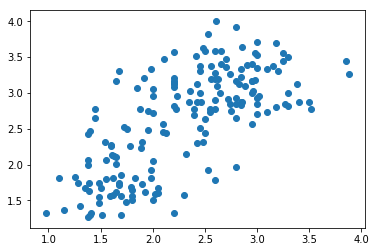

In [5]:
wine = wine_data[['total_phenols', 'od280']]
wine = wine.values
print(wine[0:10,:])

import matplotlib.pyplot as plt
%matplotlib inline 

plt.scatter(wine[:,0],wine[:,1])
plt.show()

#### Also check the correlation 

In [6]:
from scipy.stats import pearsonr

correlation, p_value = pearsonr(wine[:,0], wine[:,1])
print(correlation)

0.699949364791


In [9]:
# apply PCA

array([[ 2.8 ,  3.92],
       [ 2.65,  3.4 ],
       [ 2.8 ,  3.17],
       [ 3.85,  3.45],
       [ 2.8 ,  2.93],
       [ 3.27,  2.85],
       [ 2.5 ,  3.58],
       [ 2.6 ,  3.58],
       [ 2.8 ,  2.85],
       [ 2.98,  3.55],
       [ 2.95,  3.17],
       [ 2.2 ,  2.82],
       [ 2.6 ,  2.9 ],
       [ 3.1 ,  2.73],
       [ 3.3 ,  3.  ],
       [ 2.85,  2.88],
       [ 2.8 ,  2.65],
       [ 2.95,  2.57],
       [ 3.3 ,  2.82],
       [ 2.7 ,  3.36],
       [ 3.  ,  3.71],
       [ 2.41,  3.52],
       [ 2.61,  4.  ],
       [ 2.48,  3.63],
       [ 2.53,  3.82],
       [ 2.63,  3.2 ],
       [ 2.85,  3.22],
       [ 2.4 ,  2.77],
       [ 2.95,  3.4 ],
       [ 2.65,  3.59],
       [ 3.  ,  2.71],
       [ 2.86,  2.88],
       [ 2.42,  2.87],
       [ 2.95,  3.  ],
       [ 2.35,  2.87],
       [ 2.7 ,  3.47],
       [ 2.6 ,  2.78],
       [ 2.45,  2.51],
       [ 2.4 ,  2.69],
       [ 3.  ,  3.53],
       [ 3.15,  3.38],
       [ 2.45,  3.  ],
       [ 3.25,  3.56],
       [ 2.

[[-1.32771994  0.45139607]
 [-0.83249607  0.23309966]
 [-0.75216868 -0.02947892]
 [-1.64026613 -0.65572401]
 [-0.56799228 -0.18335891]
 [-0.80794847 -0.59533103]
 [-0.87445337  0.46361991]
 [-0.93857004  0.38687974]
 [-0.50660014 -0.23465224]
 [-1.15919131  0.07603211]]


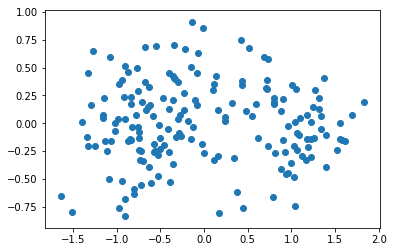

In [8]:
model = PCA()

model.fit(wine)

transformed = model.transform(wine)

print(transformed[:10,:])

plt.scatter(transformed[:,0], transformed[:,1])
plt.show()


Here we see that the axis is now centred around 0 and it's spread out in both directions equally

In [9]:
correlation, p_value = pearsonr(transformed[:,0], transformed[:,1])
print(correlation)

2.60898839978e-16


The correlation has been reduced to 0

### Intrinsic Dimension

In [11]:
from sklearn import datasets 
iris_data = datasets.load_iris()

In [12]:
iris_data.keys()

dict_keys(['feature_names', 'target', 'DESCR', 'target_names', 'data'])

In [13]:
from sklearn import datasets

iris_data = datasets.load_iris()

species = [iris_data['target_names'][x] for x in iris_data['target']]

# print(x)
df = pd.DataFrame(iris_data['data'], index = species, columns = iris_data['feature_names'])
df.head()

df2 = df.loc['versicolor']
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
versicolor,7.0,3.2,4.7,1.4
versicolor,6.4,3.2,4.5,1.5
versicolor,6.9,3.1,4.9,1.5
versicolor,5.5,2.3,4.0,1.3
versicolor,6.5,2.8,4.6,1.5


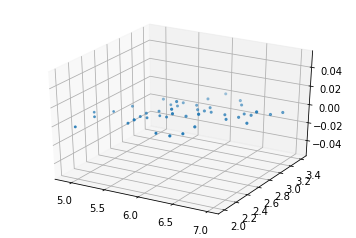

In [14]:
_3cols = df2[df2.columns[:3]].values

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


plt.scatter(_3cols[:,0], _3cols[:,1], _3cols[:,2])
plt.show()

/Users/t0mkaka/softwares/anaconda/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/collections.py:877: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


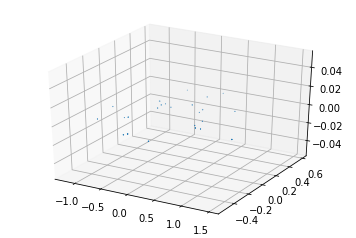

In [15]:
#PCA of above sample

model = PCA()

transformed = model.fit_transform(_3cols)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


plt.scatter(transformed[:,0], transformed[:,1], transformed[:,2], marker='*')
plt.show()

### PCA for iris dataset

[ 2.93035378  0.92740362  0.14834223  0.02074601]


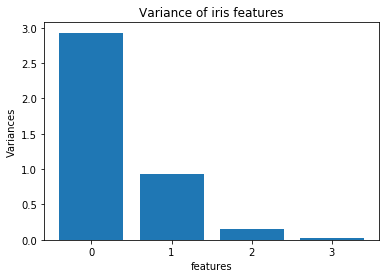

In [16]:
iris = iris_data['data']

model = PCA()

from sklearn.preprocessing import StandardScaler

iris = StandardScaler().fit_transform(iris)

transformed = model.fit_transform(iris)

variances = model.explained_variance_
print(variances)
features = range(len(variances))
plt.bar(features, variances)
plt.xticks(features)
plt.xlabel("features")
plt.ylabel("Variances")
plt.title('Variance of iris features')
plt.show()

Based on the above plot we see that instead of 4 features only 2 will suffice 

In [17]:
model = PCA(n_components=2)
pca_features = model.fit_transform(iris)
print(model.n_components_)
print(model.n_features_)

2
4


In [18]:
model.components_

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577]])

In [19]:
print(pca_features[:10,])

[[-2.26454173  0.5057039 ]
 [-2.0864255  -0.65540473]
 [-2.36795045 -0.31847731]
 [-2.30419716 -0.57536771]
 [-2.38877749  0.6747674 ]
 [-2.07053681  1.51854856]
 [-2.44571134  0.07456268]
 [-2.23384186  0.24761393]
 [-2.34195768 -1.09514636]
 [-2.18867576 -0.44862905]]


In [81]:
np.matmul(iris, model.components_.T)[:10,]

array([[-2.26454173,  0.5057039 ],
       [-2.0864255 , -0.65540473],
       [-2.36795045, -0.31847731],
       [-2.30419716, -0.57536771],
       [-2.38877749,  0.6747674 ],
       [-2.07053681,  1.51854856],
       [-2.44571134,  0.07456268],
       [-2.23384186,  0.24761393],
       [-2.34195768, -1.09514636],
       [-2.18867576, -0.44862905]])